# BINARIZZAZIONE

**Binarizzazione a soglia fissa:**
Per ogni pixel viene applicato lo stesso valore di soglia: se il valore del pixel è inferiore alla soglia, è impostato su 0, altrimenti è impostato su un valore massimo.
Per applicare questo valore di soglia usiamo la libreria cv2, in particolare il metodo threshold:
In cv2.threshold il primo argomento è l'immagine sorgente (in scala di grigi); il secondo argomento è il valore di soglia utilizzato per classificare i valori dei pixel; il terzo argomento è il valore massimo assegnato a valori di pixel che superano la soglia e infine OpenCV fornisce diversi tipi di soglie fornite dal quarto parametro della funzione. 
In questo caso la soglia di base viene eseguita utilizzando il tipo cv.THRESH_BINARY. 

Il metodo ha due output: il primo è la soglia utilizzata (in questo caso 127) e il secondo è l'immagine effettivamente binarizzata.

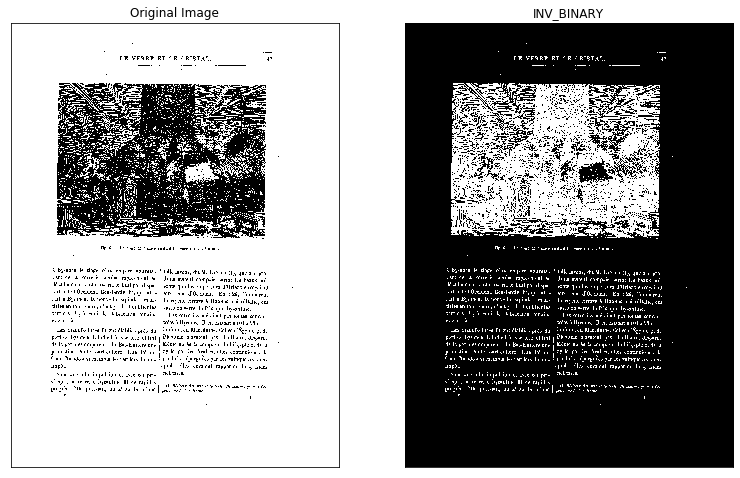

In [53]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt
#np.savetxt('matriciona.txt',labels, fmt='%10.5f', delimiter='\t')
#path = 'D:/OpenCV/Scripts/Images'
#cv2.imwrite(os.path.join(path , 'x.jpg'),img)

img_name='prova2.tif'
img = cv2.imread(img_name,0)
_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
new_name=img_name[:-4]+'_bin.tif'
cv2.imwrite(new_name, thresh)

titles = ['Original Image','INV_BINARY']
images = [img, thresh]

for i in range(1):    
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1,3,i+2),plt.imshow(images[i+1],'gray')
    plt.title(titles[i+1]), plt.xticks([]), plt.yticks([])
    '''    
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    #plt.savefig('thresh.png', dpi=1800)
    '''
plt.show()



**Binarizzazione Otsu:** 
Nell'analisi dei documenti, spesso le immagini a disposizione possono avere del rumore, abbiamo quindi bisogno di un metodo per separare il background dal foreground. 
La soglia Otsu, che può essere applicata nella segmentazione e nella binarizzazione delle immagini, è un metodo di soglia adattativo.
Esaminando tutti i possibili valori di soglia (da 0 a 255), trova il valore di soglia ottimale in modo che la varianza sia minima.
Utilizziamo l'istogramma per rappresentare la distribuzione del valore dei pixel(tra 0 e 255).
Scegliendo come valore di soglia 2, l'immagine viene separata in due classi, che corrispondono al background e al foreground.

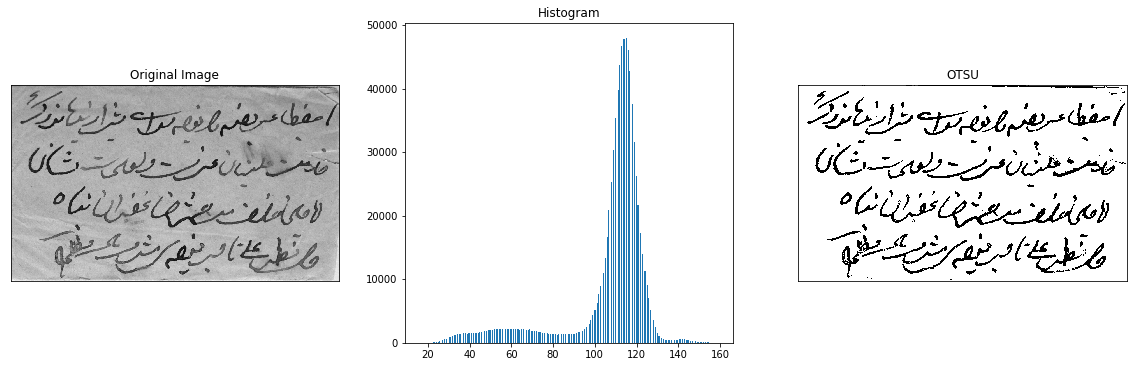

In [3]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt

img_name='persian.jpg'
img = cv2.imread(img_name,0)
_,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
new_name=img_name[:-4]+'_otsu.tif'
cv2.imwrite(new_name, thresh)

titles = ['Original Image','Histogram',"OTSU"]
images = [img, 0, thresh]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+2),plt.hist(images[i].ravel(),256)
    plt.title(titles[i+1])#, plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+3),plt.imshow(images[i+2],'gray')
    plt.title(titles[i+2]), plt.xticks([]), plt.yticks([])
    #plt.savefig('thresh_otsu.png', dpi=1800)
plt.show()

"""
plt.title(titles[0])
plt.imshow(images[0],'gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.title(titles[1])
plt.hist(images[0].ravel(),256)
plt.show()
plt.title(titles[2])
plt.imshow(images[2],'gray'), plt.xticks([]), plt.yticks([])
plt.show()
"""


# CONNECTED COMPONENTS
Le **componenti connesse** sono utilizzate nella document recognition  per segmentare e identificare gli elementi in un’immagine binaria. In particolare l’algoritmo per determinare le CC è iterativo ed etichetta un immagine in base alla vicinanza con il pixel vicino; due pixel sono vicini se sono tra loro connessi, si distingue quindi la connettività a 4 e ad 8 pixel.

Anche in questo caso per calcolare le CC utilizziamo la libreria cv2, infatti tramite la funzione connectedComponents( ), che ci permette di indicare il valore di connettività da utilizzare (4 o 8), possiamo calcolare il numero di cc rilevate e una matrice con le stesse dimensioni dell’immagine di input in cui ogni pixel ha un valore: tutti i pixel 0 rappresentano lo sfondo, il pixel che ha valore 1 rappresenta il primo cc e così via.

number of CC with connectivity 4: 49


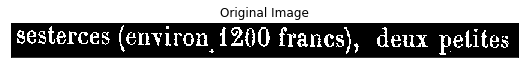

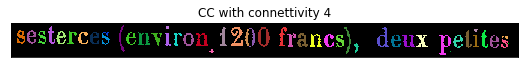

number of CC with connectivity 8: 45


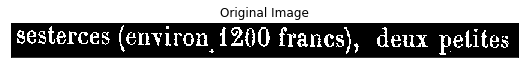

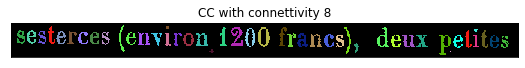

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='row.tif'
img = cv2.imread(img_name, 0)
img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
#img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]
    
def show_CC(img,conn):
    cc, labels = cv2.connectedComponents(img,connectivity=conn)
    #creo immagine a 3 canali
    labeled_img = cv2.merge([labels,labels,labels])
    rows,cols,ch= np.shape(labeled_img)
    #creo una matrice di colori da assegnare alle componenti connesse
    savedcolor=random_colors(cc)
    
    for i in range(rows):
        for j in range(cols):
            if labeled_img[i][j][0]!=0:
                for h in range(len(savedcolor)):
                    if labeled_img[i][j][0]==savedcolor[h][0]:
                        labeled_img[i][j]=savedcolor[h][1]           

    if conn==4:
        new_name=img_name[:-4]+'_CC4.tif'
        cv2.imwrite(new_name,labeled_img)
        print('number of CC with connectivity 4:',cc)
        titles = ['Original Image','CC with connettivity 4']
    elif conn==8:
        new_name=img_name[:-4]+'_CC8.tif'
        cv2.imwrite(new_name,labeled_img)
        print('number of CC with connectivity 8:',cc)
        titles = ['Original Image','CC with connettivity 8']
    images = [img, labeled_img]
    for i in range(2):
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()
    
def random_colors(cc):
    savedcolor=[]
    for k in range(cc):
        color = list(np.random.choice(range(256), size=3))
        savedcolor.append([k,color])
    savedcolor[0][1]=[0,0,0]
    return savedcolor
    
def main_colors(cc):
    savedcolor=[]
    main_color=[[255,0,0],[255,255,255],[255,255,0],[0,255,0],[0,255,255],[0,0,255],[255,0,255],[128,0,128],[0,128,0]]
    for l in range(cc):
        color=randint(0,8)
        savedcolor.append([l,main_color[color]])
    savedcolor[0][1]=[0,0,0]
    return savedcolor


show_CC(img,4)
show_CC(img,8)

# RLSA
...

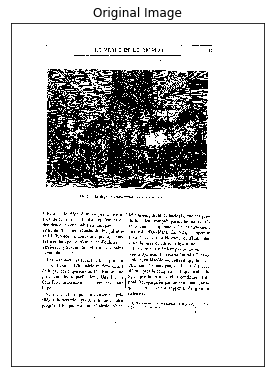

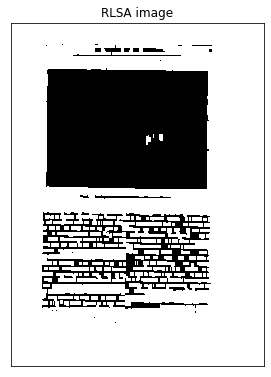

In [89]:
import numpy

img_name='prova2.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    #esegue l'iterazione sull'immagine fornita convertendo il valore del pixel da 255 a 0 se 
    #il numero di pixel consecutivi con valore 255 è minore del "valore" fornito
def iteration(image, value: int):
    rows, cols = image.shape
    for row in range(rows):
        try:
            start = image[row].tolist().index(0)
        except ValueError:
            start = 0

        count = start
        for col in range(start, cols):
            if image[row, col] == 0:
                if (col-count) <= value and (col-count) > 0:
                    image[row, count:col] = 0               
                count = col  
    return image 


    #RLSA consiste nell'estrarre il blocco di testo o la Regione di interesse(ROI) dall'immagine binaria
    #del documento. Bisogna passargli un'immagine binaria di tipo ndarray.
def rlsa(image, horizontal: bool = True, vertical: bool = True, value: int = 0):
    if horizontal:
            image = iteration(image, value)
    if vertical: 
            image = image.T
            image = iteration(image, value)
            image = image.T
    return image

newimg=rlsa(img_bin,value=30)
new_name=img_name[:-4]+'_RLSA.tif'
cv2.imwrite(new_name,newimg)
titles = ['Original Image','RLSA image']
images = [img, newimg]

for i in range(2):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

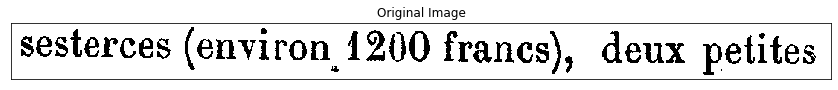

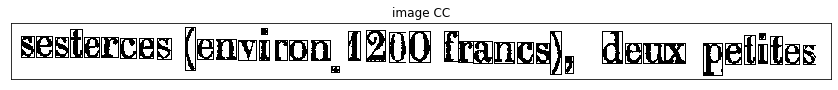

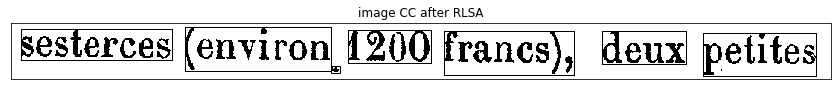

In [164]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt

img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img_bin.copy()
contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    
new_name=img_name[:-4]+'_rect.tif'
cv2.imwrite(new_name,img_bin)


img_rlsa = rlsa(img_bin.copy(), value=6)

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_rlsa)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno alle parole
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img2, (x,y), (x+w,y+h), (0, 255, 0), 1)

new_name=img_name[:-4]+'_rectRLSA.tif'
cv2.imwrite(new_name,cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

titles = ['Original Image','image CC', 'image CC after RLSA']
images = [img, img_bin, img2]

for i in range(3):
    plt.figure(figsize=(50,50))
    plt.subplot(1,3,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

**Come sapere quale value mettere nella funzione RLSA?**

Viene stabilito in base alla distanza media dei pixel nell'immagine. La seguente funzione calcola la distanza tra i pixel e ne fa la media 

5.095184613224765
[ -1 187   1 ...   1   1   1]


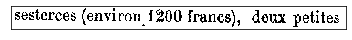

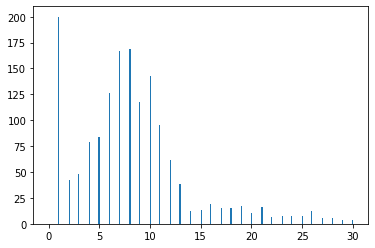

In [308]:
img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def pixelDistance(image, vertical: bool = False):
    if vertical:
        image = image.T #la uso per calcolare la distanza tra pixel in verticale
    rows, cols = image.shape
    distance=[]
    count=0
    i1=0
    flag=0
    i2=0

    for i in range(rows):
        for j in range(cols):
            '''if image[i][j]==255 and image[i][0]==255:
                if i!=i2:
                    flag=1
                    i2=i
                else:
                    flag=flag+1
                    i2=i'''
            if image[i][j]==0:
                if i!=i1:
                    distance.append('-1')
                    i1=i
                    count=0
                elif j-count-flag!=0:
                        distance.append(j-count-flag)
                        flag=0
                        count=j
                    
    distance=np.array(distance)
    return distance

def valueRLSA(distance):
    rows=distance.shape[0]
    numSum=0
    sumDist=0 
    distance = distance.astype(np.int)
    
    for k in range(rows):
        if distance[k]!= -1:
            sumDist=sumDist+distance[k]
            numSum=numSum+1  
            
    value=sumDist/numSum
    print(value)
    return value

def histogram(image,distance):
    rows=distance.shape[0]
    distance = distance.astype(np.int)
    max=0
    for h in range(rows):
        if distance[h]>max:
            max=distance[h]
    
    #serve per rendere il grafico piu leggibile, elimina pixel a distanza 1
    q1=0
    for l in range(rows):
        if distance[l]==1 and q1<200:
            q1=q1+1
        elif distance[l]==1:
            distance[l]=-1
            
    plt.imshow(image,'gray'), plt.xticks([]), plt.yticks([]), plt.show()
    plt.hist(distance,256,[0,30]), plt.show()
    #plt.savefig('hist.png', dpi=1800)

pix_dist=pixelDistance(img_bin)
value=valueRLSA(pix_dist)
histogram(img_bin,pix_dist)